## Projeto Matplotlib - Categorização salarial dos campos da ciência de dados

    Salários de diferentes campos da ciência de dados no domínio da ciência de dados
    Dicionário de dados:

  - Ano de Trabalho: O ano em que o salário foi pago ( 2020, 2021, 2022)
  - Designação: O papel desempenhado durante o ano
  - Experiência: O nível de experiência no trabalho durante o ano.
     
      [ PT - Nível de entrada / Júnior, MI - Nível médio /   Intermediário, SE - Nível sênior / Especialista, EX - Nível executivo / Diretor ]
      
  - Situação Laboral:	O tipo de emprego para a função.
     
      [ PT - Part time, FT - Full time, CT - Contract, FL - Freelance ]
      
  - Salário em rúpias: O valor total do salário bruto pago.
  - Localização do funcionário: O principal país de residência do empregado durante o ano de trabalho como um código de país ISO 3166. ( PFB Link para o código de país ISO 3166 )
  - Localização da empresa: O país da sede ou sucursal contratante do empregador.
  - Tamanho da empresa: O número médio de pessoas que trabalharam para a empresa durante o ano.
      
      [ S(pequeno) - Menos de 50 trabalhadores, M (médio) - 50 a 250 trabalhadores, L (grande) - Mais de 250 trabalhadores ]
      
  - Relação de trabalho remoto: A quantidade total de trabalho feito remotamente.
      
      [ 0 - Sem trabalho remoto (menos de 20%), 50 - Parcialmente remoto, 100 - totalmente remoto (mais de 80%) ]
        
        
- https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

# Informe o nome dos participantes do trabalho:
### Nome aluno 1: Breno Cauã Batista Prestes, RA: 2598582,  TURMA: BCC
### Nome aluno 2: Mizael Simão Borgo Moreira Nisa RA: 2319233 TURMA: ADS

## Importar as bibliotecas necesssárias

In [ ]:
import matplotlib as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ## Importar a base de dados e visualizar as 10 primeiras linhas

In [ ]:
base = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_Science_Fields_Salary_Categorization.csv")
base.head(10)

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
5,6,2020,Data Analyst,EN,FT,"5,729,004.00",US,US,L,100
6,7,2020,Lead Data Scientist,SE,FT,"15,118,205.00",US,US,S,100
7,8,2020,Data Scientist,MI,FT,"2,843,416.00",HU,HU,L,50
8,9,2020,Business Data Analyst,MI,FT,"10,741,883.00",US,US,L,100
9,10,2020,Lead Data Engineer,SE,FT,"9,946,188.00",NZ,NZ,S,50


## Verificar os domínios dos dados e se há valores nulos

In [ ]:
base.dtypes

Unnamed: 0               int64
Working_Year             int64
Designation             object
Experience              object
Employment_Status       object
Salary_In_Rupees        object
Employee_Location       object
Company_Location        object
Company_Size            object
Remote_Working_Ratio     int64
dtype: object

In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            607 non-null    int64 
 1   Working_Year          607 non-null    int64 
 2   Designation           607 non-null    object
 3   Experience            607 non-null    object
 4   Employment_Status     607 non-null    object
 5   Salary_In_Rupees      607 non-null    object
 6   Employee_Location     607 non-null    object
 7   Company_Location      607 non-null    object
 8   Company_Size          607 non-null    object
 9   Remote_Working_Ratio  607 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 47.5+ KB


In [ ]:
base.isnull().sum()

Unnamed: 0              0
Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Salary_In_Rupees        0
Employee_Location       0
Company_Location        0
Company_Size            0
Remote_Working_Ratio    0
dtype: int64


## Corrigir os domínios dos dados

In [ ]:
# convertendo a coluna Salary_In_Rupees para número
base['Salary_In_Rupees'] = base['Salary_In_Rupees'].str.replace(',', '')
base['Salary_In_Rupees'] = pd.to_numeric(base['Salary_In_Rupees'], errors='coerce')
base['Working_Year'] = pd.to_numeric(base['Working_Year'], errors='coerce')

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            607 non-null    int64  
 1   Working_Year          607 non-null    int64  
 2   Designation           607 non-null    object 
 3   Experience            607 non-null    object 
 4   Employment_Status     607 non-null    object 
 5   Salary_In_Rupees      607 non-null    float64
 6   Employee_Location     607 non-null    object 
 7   Company_Location      607 non-null    object 
 8   Company_Size          607 non-null    object 
 9   Remote_Working_Ratio  607 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 47.5+ KB


In [ ]:
# verificando se há salário negativo
has_negative_value = (base["Salary_In_Rupees"] < 0).any()
print(has_negative_value)

# verificando se há Remote Working Ratio negativo
has_negative_value = (base["Remote_Working_Ratio"] < 0).any()
print(has_negative_value)

# verificando se há anos menor que 2020
has_negative_value = (base["Working_Year"] < 2020).any()
print(has_negative_value)

# verificando se há anos maior que 2022
has_negative_value = (base["Working_Year"] > 2022).any()
print(has_negative_value)

False
False
False
False


## Excluir colunas desnecessárias

In [ ]:
base = base.drop(['Employee_Location', 'Company_Location', 'Company_Size', 'Unnamed: 0'], axis=1) #exclui uma coluna desnecessária na análise a ser realizada

## Verificar os dados estatísticos da base

In [ ]:
base_estatistica = base[["Remote_Working_Ratio", "Salary_In_Rupees"]]

In [ ]:
base_estatistica.describe().round(2)

,Remote_Working_Ratio,Salary_In_Rupees
count,607.00,607.00
mean,70.92,8935485.43
std,40.71,5646033.67
min,0.00,227489.00
25%,50.00,4991076.00
50%,100.00,8081874.00
75%,100.00,11935425.00
max,100.00,47741700.00


## Plotar a média salarial em um gráfico separando em dois subplots com 1 linha 2 colunas:
-  No primeiro apresentar a média salarial por tipo de experiência para o ano de 2020
-  No segundo apresentar a média salarial por tipo de experiência para o ano de 2022

In [ ]:
# Cria uma cópia da base de dados original para o ano de 2020
ano_2020 = base.copy()
ano_2020 = ano_2020[ano_2020["Working_Year"] == 2020]

# Exclui as colunas desnecessárias
ano_2020 = ano_2020.drop(['Working_Year', 'Designation', 'Employment_Status', 'Remote_Working_Ratio'], axis=1)

# Agrupa os dados pela experiência e calcula a média salarial
ano_2020 = ano_2020.groupby(['Experience']).mean().round(2)

In [ ]:
# Cria uma cópia da base de dados original para o ano de 2022
ano_2022 = base.copy()
ano_2022 = ano_2022[ano_2022["Working_Year"] == 2022]

# Exclui as colunas desnecessárias
ano_2022 = ano_2022.drop(['Working_Year', 'Designation', 'Employment_Status', 'Remote_Working_Ratio'], axis=1)

# Agrupa os dados pela experiência e calcula a média salarial
ano_2022 = ano_2022.groupby(['Experience']).mean().round(2)

In [ ]:
def plot_salary_experience_mean(ano_2020, ano_2022, figSize = (6.4, 4.8), gridspecKw = None):
  # Cria uma figura e dois subplots
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = figSize, gridspec_kw = gridspecKw)

  # Cria uma função para formatar os números com duas casas decimais
  format_decimal = ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x))

  # Plota a média salarial para o ano de 2020 no primeiro subplot
  ax1.plot(ano_2020.index, ano_2020['Salary_In_Rupees'])
  ax1.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
  ax1.set_title('Média Salarial por Experiência em 2020')
  ax1.set_xlabel('Experiência')
  ax1.set_ylabel('Média Salarial')

  # Plota a média salarial para o ano de 2022 no segundo subplot
  ax2.plot(ano_2022.index, ano_2022['Salary_In_Rupees'])
  ax2.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
  ax2.set_title('Média Salarial por Experiência em 2022')
  ax2.set_xlabel('Experiência')
  ax2.set_ylabel('Média Salarial')

  # Ajusta o layout para evitar sobreposição
  plt.tight_layout()

  # Mostra a figura
  plt.show()

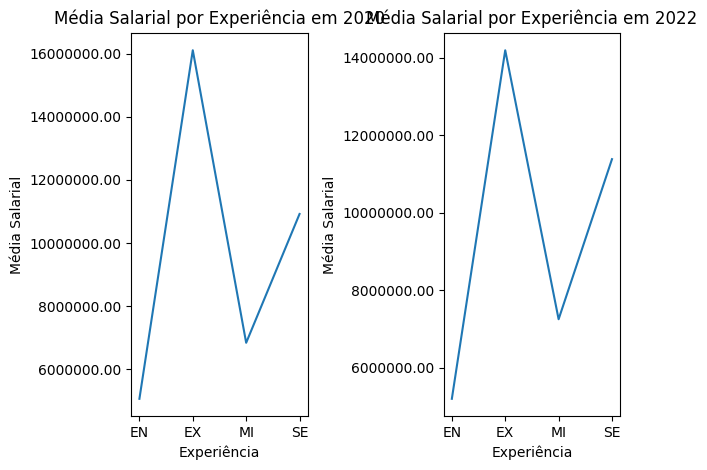

In [ ]:
plot_salary_experience_mean(ano_2020, ano_2022)

## Melhorando a visualização
- Para aumentar o tamanho do gráfico podemos usar o `figsize=(x,y)`
- Se quisermos mudar a proporção dos gráficos, podemos usar o `gridspec_kw={'height_ratios': []}`

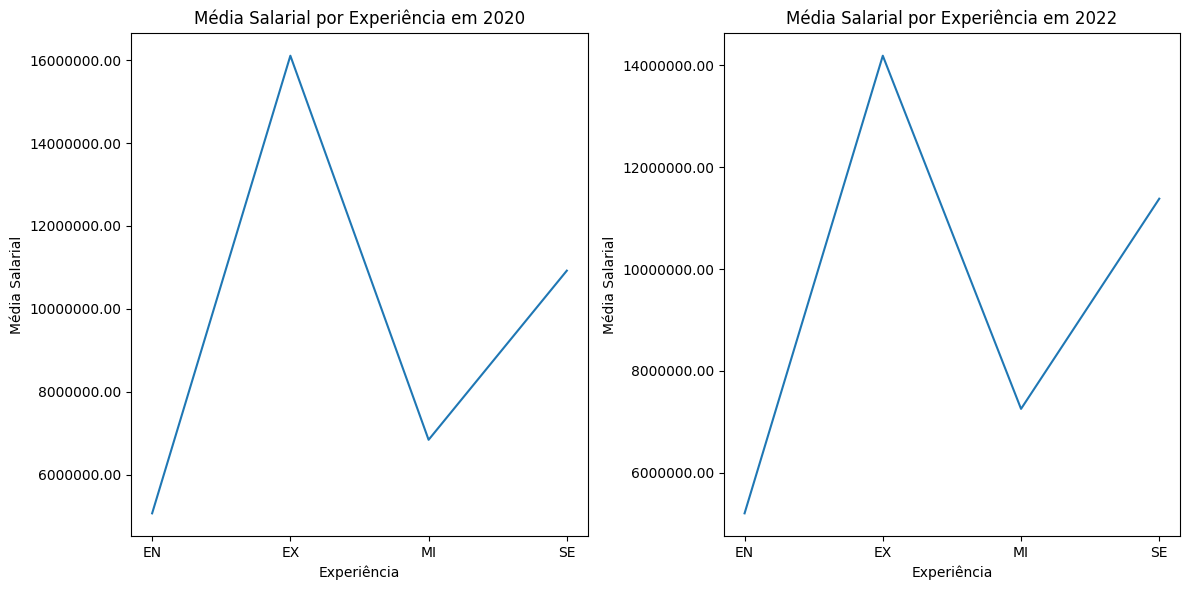

In [ ]:
plot_salary_experience_mean(ano_2020, ano_2022, (12, 6), {'height_ratios':[1]})

## Plotar a média salarial em um gráfico de barras separando em dois subplots com 2 linhas 1 coluna:
- No primeiro apresentar a média salarial pela Designação para o ano de 2022 para os top 5
- No segundo apresentar a média salarial pela Designação para o ano de 2022 para as 5 menores médias

In [ ]:
# Cria uma cópia da base de dados original para o ano de 2022
ano_2022 = base.copy()
ano_2022 = ano_2022[ano_2022["Working_Year"] == 2022]

# Exclui as colunas desnecessárias
ano_2022 = ano_2022.drop([ 'Employment_Status', 'Remote_Working_Ratio'], axis=1)

# Agrupa os dados pela designação e calcula a média salarial
media_salarial_por_designacao = ano_2022.groupby('Designation')['Salary_In_Rupees'].mean()

# Ordena os valores e pega os top 5 e os 5 menores
top_5 = media_salarial_por_designacao.sort_values(ascending=False).head(5)
bottom_5 = media_salarial_por_designacao.sort_values().head(5)

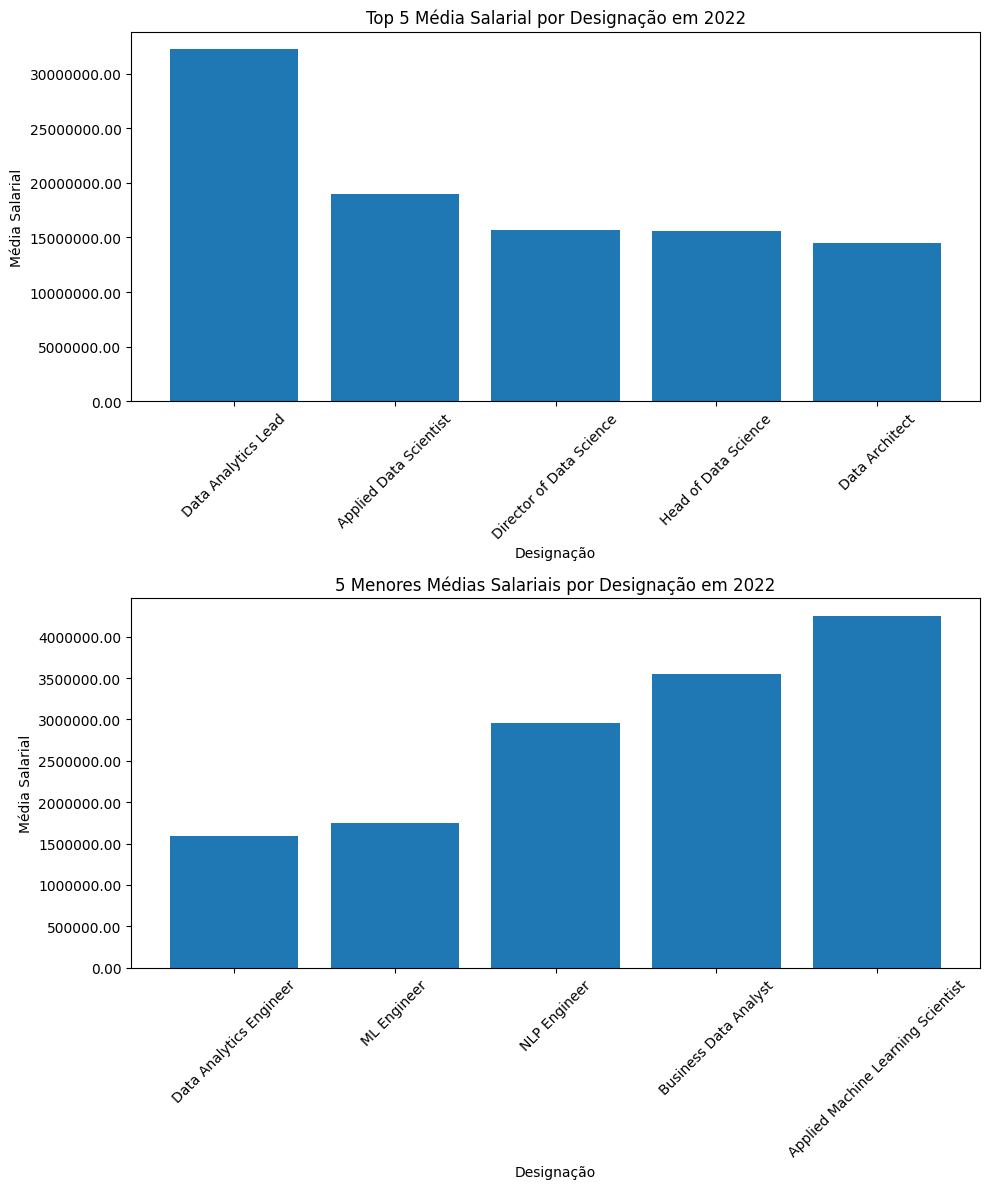

In [ ]:
# Cria uma figura e dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Cria uma função para formatar os números com duas casas decimais
format_decimal = ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x))

# Plota a média salarial para as top 5 designações no primeiro subplot
ax1.bar(top_5.index, top_5.values)
ax1.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax1.set_title('Top 5 Média Salarial por Designação em 2022')
ax1.set_xlabel('Designação')
ax1.set_ylabel('Média Salarial')
ax1.tick_params(axis='x', rotation=45)
# Plota a média salarial para as 5 menores designações no segundo subplot
ax2.bar(bottom_5.index, bottom_5.values)
ax2.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax2.set_title('5 Menores Médias Salariais por Designação em 2022')
ax2.set_xlabel('Designação')
ax2.set_ylabel('Média Salarial')
ax2.tick_params(axis='x', rotation=45)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra a figura
plt.show()


## Colocando rótulo nos dados
- Para isso, vamos usar o `annotate`
    - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html
    - Para usar o annotate, vamos passar `.annotate("<Texto>",<posicao(x,y)>)`
- Podemos posicionar o annotate exatamente em cima da barra usando a posição y
- Usando o `for`, é possível aplicar o annotate para todas as barras
- Por fim, vamos usar os parâmetros do annotate para melhorar a visualização
    - ha         -> alinhamento horizontal
    - xytext     -> deslocamento x,y do texto em relação a um referencial
    - textcoords -> referencial que vamos fazer o deslocamento acima
    - fontsize   -> tamanho da fonte
    - fontweight -> colocando em negrito

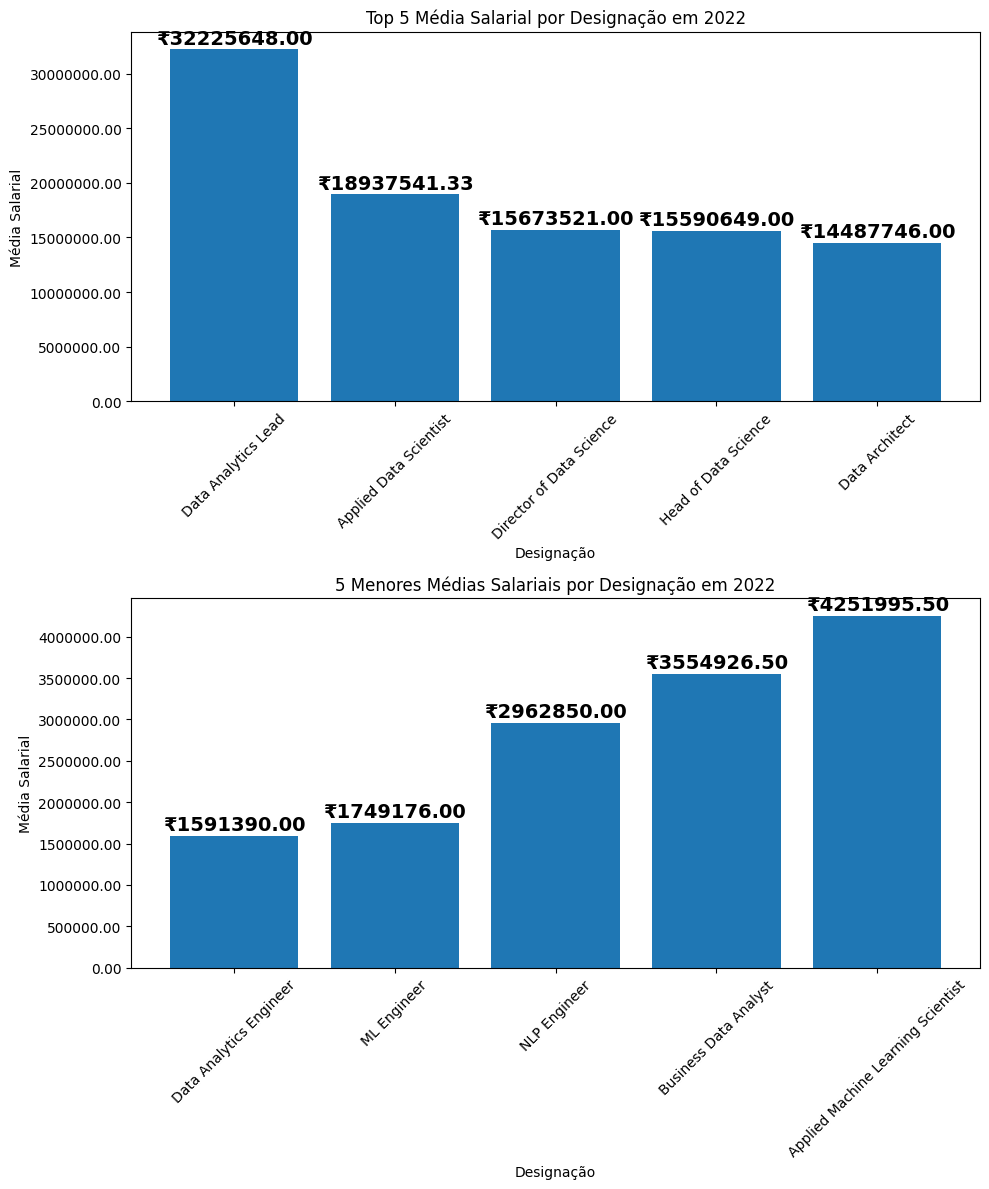

In [ ]:
# Cria uma figura e dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Cria uma função para formatar os números com duas casas decimais
format_decimal = ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x))

# Plota a média salarial para as top 5 designações no primeiro subplot
ax1.bar(top_5.index, top_5.values)
ax1.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax1.set_title('Top 5 Média Salarial por Designação em 2022')
ax1.set_xlabel('Designação')
ax1.set_ylabel('Média Salarial')
ax1.tick_params(axis='x', rotation=45)
# Plota a média salarial para as 5 menores designações no segundo subplot
ax2.bar(bottom_5.index, bottom_5.values)
ax2.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax2.set_title('5 Menores Médias Salariais por Designação em 2022')
ax2.set_xlabel('Designação')
ax2.set_ylabel('Média Salarial')
ax2.tick_params(axis='x', rotation=45)

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,5):
    ax1.annotate('₹{:.2f}'.format(top_5.values[i]), # Valores que vão ser mostrados como rótulos, já formatados
                (top_5.index[i],top_5.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
               )
    ax2.annotate('₹{:.2f}'.format(bottom_5.values[i]), # Valores que vão ser mostrados como rótulos, já formatados
                (bottom_5.index[i],bottom_5.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
               )

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra a figura
plt.show()

## Ajustando o eixo y para melhorar a visualização dos rótulos
- O `.set_yticks` vai permitir que alterar o intervalo do eixo y
- O `.yaxis.set_visible` permite que os valores do eixo y não fiquem visíveis

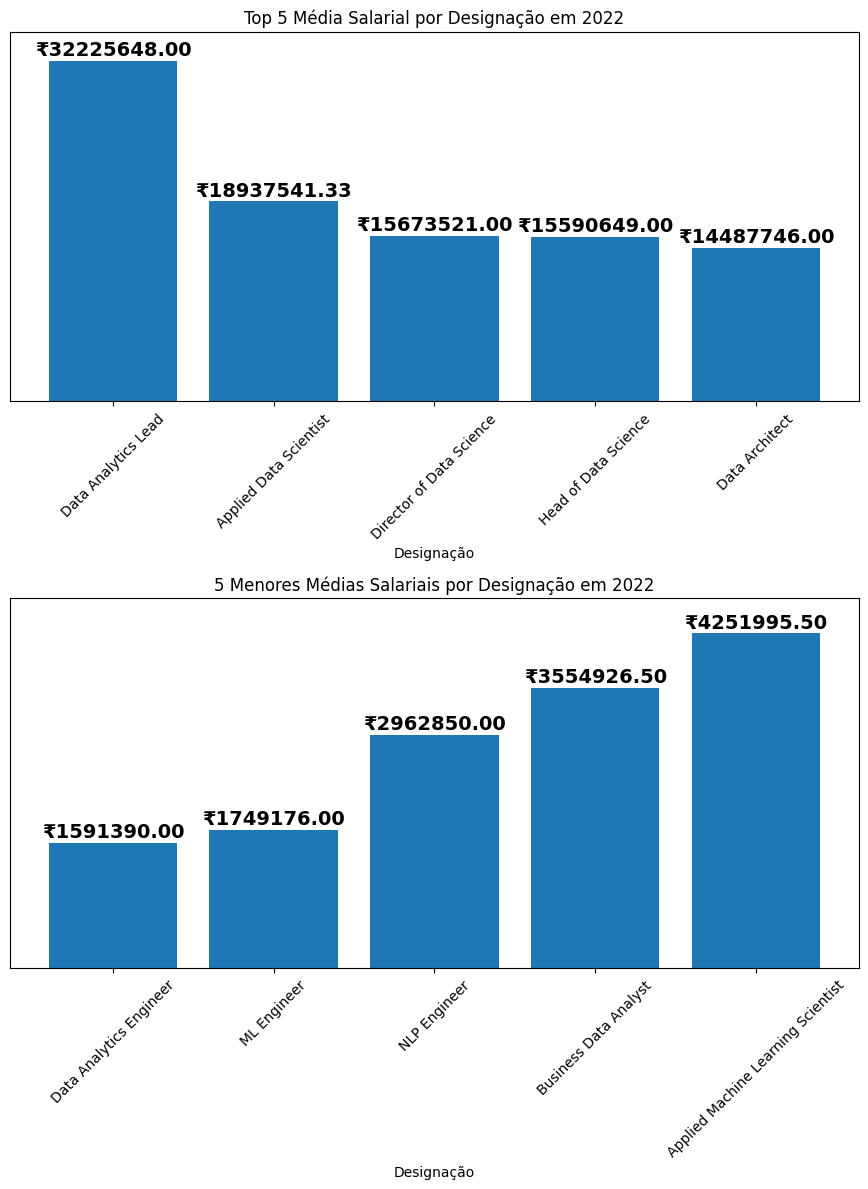

In [ ]:
# Cria uma figura e dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Cria uma função para formatar os números com duas casas decimais
format_decimal = ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x))

# Plota a média salarial para as top 5 designações no primeiro subplot
ax1.bar(top_5.index, top_5.values)
ax1.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax1.set_title('Top 5 Média Salarial por Designação em 2022')
ax1.set_xlabel('Designação')
ax1.set_ylabel('Média Salarial')
ax1.tick_params(axis='x', rotation=45)
# Plota a média salarial para as 5 menores designações no segundo subplot
ax2.bar(bottom_5.index, bottom_5.values)
ax2.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax2.set_title('5 Menores Médias Salariais por Designação em 2022')
ax2.set_xlabel('Designação')
ax2.set_ylabel('Média Salarial')
ax2.tick_params(axis='x', rotation=45)

# O Annotate é quem vai permitir que a gente coloque rótulo nos dados
for i in np.arange(0,5):
    ax1.annotate('₹{:.2f}'.format(top_5.values[i]), # Valores que vão ser mostrados como rótulos, já formatados
                (top_5.index[i],top_5.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
               )
    ax2.annotate('₹{:.2f}'.format(bottom_5.values[i]), # Valores que vão ser mostrados como rótulos, já formatados
                (bottom_5.index[i],bottom_5.values[i]), # Posição (x,y que esses valores vão estar)
                ha="center",  # Alinhamento horizontal do texto
                va="top", # Alinhamento vertical do texto
                xytext=(0,15), # Deslocamento em relação ao ponto que o texto estaria
                textcoords="offset points",  # Sistema de coordenadas que o xytext vai ter como referência (nesse caso será em pontos, não em pixels)
                fontsize=14, # Tamanho da fonte dos rótulos
                fontweight='bold', # Espessura da fonte dos rótulos
               )

# Ajusta o layout para evitar sobreposição
plt.tight_layout()


# Ajustando o intervalo dos valores no eixo Y em ambos os graficos
ax1.set_yticks([5000000, 15000000, 25000000, 35000000])
ax2.set_yticks([1000000, 2000000, 3000000, 4700000])

# Tirando o eixo y em ambos os graficos
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)

# Mostra a figura
plt.show()

## Retirando bordas do gráfico
- Usando o `.spines[].set_visible(False)` é possível retirar as bordas de um gráfico

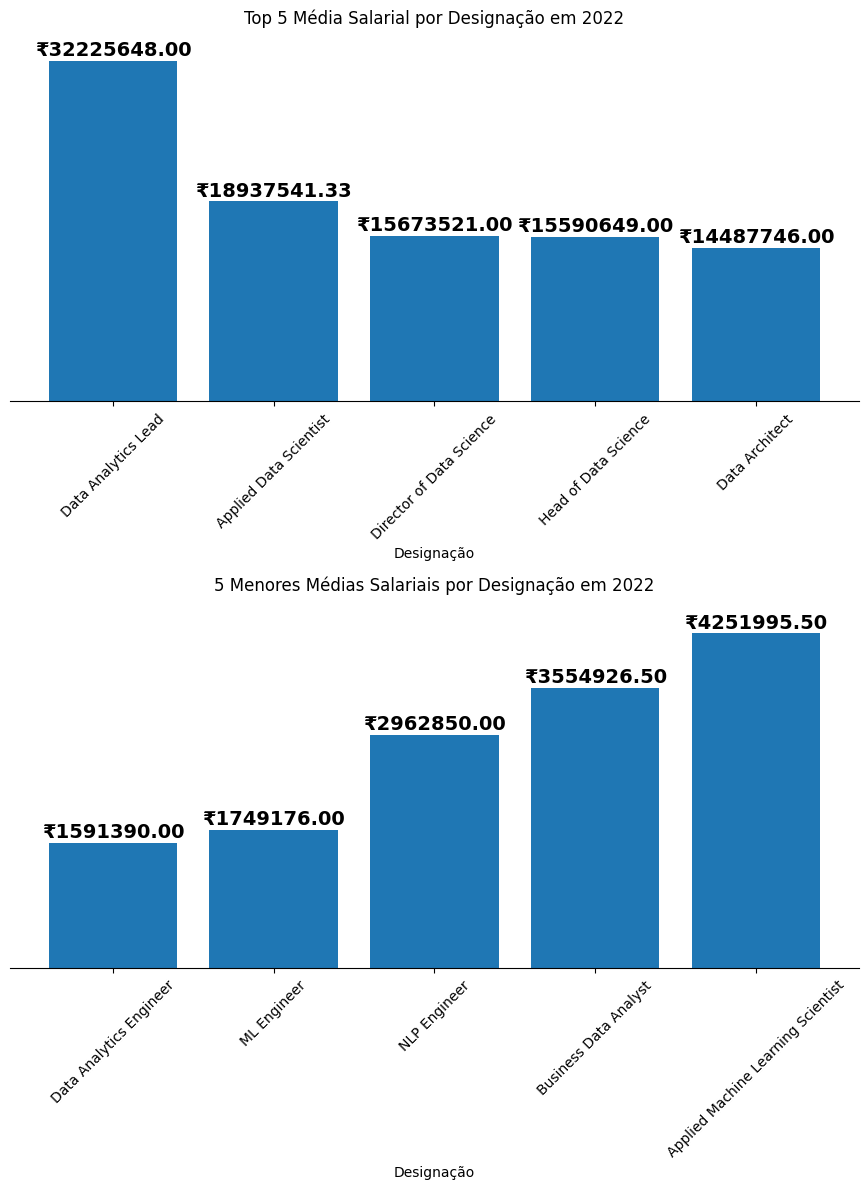

In [ ]:
# Cria uma figura e dois subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Cria uma função para formatar os números com duas casas decimais
format_decimal = ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x))

# Plota a média salarial para as top 5 designações no primeiro subplot
ax1.bar(top_5.index, top_5.values)
ax1.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax1.set_title('Top 5 Média Salarial por Designação em 2022')
ax1.set_xlabel('Designação')
ax1.set_ylabel('Média Salarial')
ax1.tick_params(axis='x', rotation=45)

# Plota a média salarial para as 5 menores designações no segundo subplot
ax2.bar(bottom_5.index, bottom_5.values)
ax2.yaxis.set_major_formatter(format_decimal)  # Aplica a formatação ao eixo y
ax2.set_title('5 Menores Médias Salariais por Designação em 2022')
ax2.set_xlabel('Designação')
ax2.set_ylabel('Média Salarial')
ax2.tick_params(axis='x', rotation=45)

for i in np.arange(0,5):
    ax1.annotate('₹{:.2f}'.format(top_5.values[i]),
                (top_5.index[i],top_5.values[i]),
                ha="center",
                va="top",
                xytext=(0,15),
                textcoords="offset points",
                fontsize=14,
                fontweight='bold',
               )
    ax2.annotate('₹{:.2f}'.format(bottom_5.values[i]),
                (bottom_5.index[i],bottom_5.values[i]),
                ha="center",
                va="top",
                xytext=(0,15),
                textcoords="offset points",
                fontsize=14,
                fontweight='bold',
               )

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Ajustando o intervalo dos valores no eixo Y em ambos os graficos
ax1.set_yticks([5000000, 15000000, 25000000, 35000000])
ax2.set_yticks([1000000, 2000000, 3000000, 4700000])

# Tirando o eixo y em ambos os graficos
ax1.yaxis.set_visible(False)
ax2.yaxis.set_visible(False)

# Retirando as bordas de ambos os graficos
ax1.spines[['top', 'left', 'right']].set_visible(False)
ax2.spines[['top', 'left', 'right']].set_visible(False)

# Mostra a figura
plt.show()

## Conclusão
Com base nos gráficos apresentados, qual a conclusão que se pode chegar?

Os salários médios variam dependendo da experiência e da posição ocupada.
Geralmente, profissionais com mais experiência, como sênior (SE) e executiva (EX), recebem salários melhores em comparação com aqueles que estão começando (PT) ou têm experiência intermediária (MI).
Algumas das designações que oferecem os salários mais elevados se incluem:

*   Diretor de Ciência de Dados
*   Arquiteto de Dados
*  Engenheiro de Aprendizado de Máquina
*   Cientista de Dados

No entanto, cargos como Analista de Dados, Engenheiro de Dados Júnior e Cientista de Dados Júnior geralmente têm salários mais baixos.








## Desafio
### Elaborar nuvem de palavras dos cargos mais bem remunerados em Ciência de Dados. Utilize a função WorldClound(), verifique todos os parâmetros necessários para sua utilização


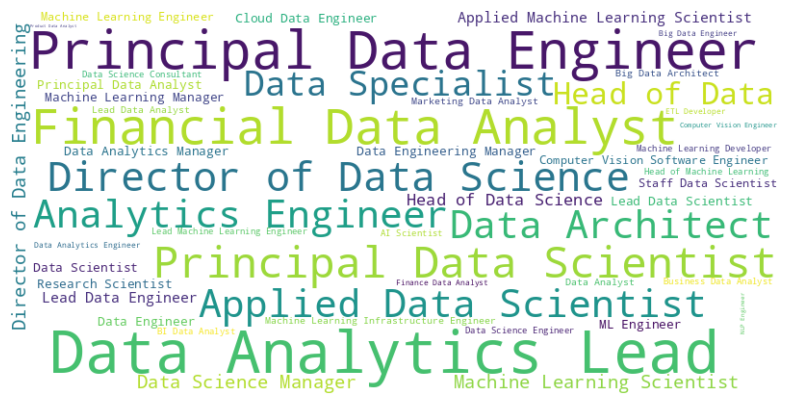

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calcula a média salarial para cada cargo
media_salarial_por_cargo = base.groupby('Designation')['Salary_In_Rupees'].mean()

# Ordena os cargos pela média salarial em ordem decrescente
cargos_ordenados = media_salarial_por_cargo.sort_values(ascending=False)

# Cria um dicionário onde as chaves são os cargos e os valores são as médias salariais
cargos_e_salarios = dict(cargos_ordenados)

# Cria a nuvem de palavras
nuvem_palavras = WordCloud(width=800, height=400, max_words=200, background_color='white').generate_from_frequencies(cargos_e_salarios)

# Mostra a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()
